# スクリーニングの検証

In [1]:
cd /Users/shintaro/Downloads/

/Users/shintaro/Downloads


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams['font.family'] = 'IPAexGothic'
from sklearn.preprocessing import scale
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis as FA
import japanize_matplotlib

In [3]:
data1 = pd.read_csv("/Users/shintaro/Downloads/第3スクリーニング_検証.csv", encoding = 'Shift_JIs')
marketcap = pd.read_csv("/Users/shintaro/Downloads/第3スクリーニング_検証.csv", encoding = 'Shift_JIs')

In [4]:
data1

銘柄名称      日経平均    TOPIX   エーザイ  ファンケル  キヤノン  デンソー  三菱総合研究所  日本郵船  大日本印刷  \
0   16-Jul  16569.27  1322.74   6044   1721  2935  4046     3180  1840   2308   
1   16-Aug  16887.40  1329.54   6030   1633  2964  4272     3125  1880   2104   
2   16-Sep  16449.84  1322.78   6287   1717  2924  4000     3170  1880   1972   
3   16-Oct  17425.02  1393.02   6698   1587  3017  4565     3335  2150   2108   
4   16-Nov  18308.48  1469.43   6609   1581  3261  4980     3240  2120   2164   
..     ...       ...      ...    ...    ...   ...   ...      ...   ...    ...   
56  21-Mar  29178.80  1954.00   7419   3735  2503  7347     4120  3775   2319   
57  21-Apr  28812.63  1898.24   7129   3570  2603  7059     4120  4290   2171   
58  21-May  28860.08  1922.98   7358   3450  2560  7503     3900  4515   2359   
59  21-Jun  28791.53  1943.57  10925   3600  2513  7579     3945  5630   2349   
60  21-Jul  27283.59  1901.08   8983   3470  2497  7482     3985  5880   2566   

    ...    鈴木  日立製作所  三菱重工業  アサヒグループホールディングス  住友林業   リコー  日産自動車  三井不動産  川崎重工業  \
0   ...   509   2382   4430             3496  1455   916   1012   2254   3070   
1   ...   507   2480   4500             3386  1400   933   1015   2228   3030   
2   ...   531   2343   4190             3666  1345   910    983   2136   3100   
3   ...   528   2796   4490             3751  1464   856   1069   2391   3070   
4   ...   513   3046   5070             3722  1565   921   1057   2691   3610   
..  ...   ...    ...    ...              ...   ...   ...    ...    ...    ...   
56  ...  1091   5004   3449             4665  2386  1124    616   2514   2742   
57  ...  1185   5381   3247             4565  2530  1162    548   2370   2613   
58  ...  1066   5736   3315             5219  2216  1298    539   2550   2632   
59  ...   976   6361   3269             5191  2035  1247    551   2573   2375   
60  ...   912   6258   3144             4911  2068  1191    631   2553   2278   

    日本航空  
0   3196  
1   3147  
2   2959  
3   3096  
4   3385  
..   ...  
56  2470  
57  2321  
58  2499  
59  2401  
60  2283  

[61 rows x 40 columns]

In [5]:
del marketcap['銘柄名称']
del marketcap['TOPIX']
del marketcap['日経平均']
del marketcap['キヤノン']


In [6]:
marketcap

エーザイ  ファンケル  デンソー  三菱総合研究所  日本郵船  大日本印刷   東洋紡  コニカミノルタ   京セラ  ＫＤＤＩ  ...  \
0    6044   1721  4046     3180  1840   2308  1950      836  4891  3145  ...   
1    6030   1633  4272     3125  1880   2104  1640      932  4916  3036  ...   
2    6287   1717  4000     3170  1880   1972  1690      850  4823  3115  ...   
3    6698   1587  4565     3335  2150   2108  1720      941  5110  3192  ...   
4    6609   1581  4980     3240  2120   2164  1720     1092  5436  2999  ...   
..    ...    ...   ...      ...   ...    ...   ...      ...   ...   ...  ...   
56   7419   3735  7347     4120  3775   2319  1424      600  7025  3395  ...   
57   7129   3570  7059     4120  4290   2171  1322      618  6637  3306  ...   
58   7358   3450  7503     3900  4515   2359  1352      598  6722  3717  ...   
59  10925   3600  7579     3945  5630   2349  1333      614  6868  3465  ...   
60   8983   3470  7482     3985  5880   2566  1384      560  6737  3332  ...   

      鈴木  日立製作所  三菱重工業  アサヒグループホールディングス  住友林業   リコー  日産自動車  三井不動産  川崎重工業  日本航空  
0    509   2382   4430             3496  1455   916   1012   2254   3070  3196  
1    507   2480   4500             3386  1400   933   1015   2228   3030  3147  
2    531   2343   4190             3666  1345   910    983   2136   3100  2959  
3    528   2796   4490             3751  1464   856   1069   2391   3070  3096  
4    513   3046   5070             3722  1565   921   1057   2691   3610  3385  
..   ...    ...    ...              ...   ...   ...    ...    ...    ...   ...  
56  1091   5004   3449             4665  2386  1124    616   2514   2742  2470  
57  1185   5381   3247             4565  2530  1162    548   2370   2613  2321  
58  1066   5736   3315             5219  2216  1298    539   2550   2632  2499  
59   976   6361   3269             5191  2035  1247    551   2573   2375  2401  
60   912   6258   3144             4911  2068  1191    631   2553   2278  2283  

[61 rows x 36 columns]

In [7]:
R = (marketcap.diff()/marketcap.shift(1))[1:] 

In [8]:
R

エーザイ     ファンケル      デンソー   三菱総合研究所      日本郵船     大日本印刷       東洋紡  \
1  -0.002316 -0.051133  0.055858 -0.017296  0.021739 -0.088388 -0.158974   
2   0.042620  0.051439 -0.063670  0.014400  0.000000 -0.062738  0.030488   
3   0.065373 -0.075713  0.141250  0.052050  0.143617  0.068966  0.017751   
4  -0.013288 -0.003781  0.090909 -0.028486 -0.013953  0.026565  0.000000   
5   0.014980  0.033523  0.016667  0.015432  0.023585  0.067468  0.011628   
6  -0.073494 -0.046512 -0.031997 -0.007599  0.105991 -0.005195  0.051724   
7   0.013837  0.063543  0.018568 -0.027565  0.033333  0.063534  0.065574   
8  -0.085225 -0.034400 -0.019030  0.015748 -0.052419 -0.018003 -0.010256   
9   0.015267  0.171875 -0.020012  0.001550 -0.046809  0.033333  0.020725   
10 -0.002734  0.108800 -0.016253 -0.037152 -0.102679 -0.007258 -0.010152   
11  0.063228 -0.006734  0.004448  0.048232  0.039801  0.013810  0.056410   
12 -0.046092  0.148668  0.118937 -0.027607  0.009569 -0.024840  0.019417   
13 -0.038013  0.090641  0.005654 -0.009464  0.033175  0.066557 -0.052381   
14  0.014401 -0.060688  0.066904  0.055732  0.072936  0.037365  0.076884   
15  0.090201  0.227160  0.087652  0.015083  0.018811  0.004456  0.016799   
16  0.011752  0.078135  0.018249  0.117385  0.098615 -0.092421 -0.060578   
17  0.007063  0.035770  0.072641  0.050532  0.050038  0.023625  0.000000   
18 -0.028834  0.031532  0.008872 -0.062025 -0.006548 -0.033028  0.014656   
19 -0.085861  0.120815 -0.078851 -0.060729 -0.146100 -0.073663  0.014444   
20  0.190485  0.011688 -0.073986 -0.035920 -0.078902 -0.023545 -0.003797   
21  0.083174  0.103979 -0.010997  0.143070  0.086592  0.072793  0.016675   
22  0.072430  0.169767 -0.080959  0.271186 -0.049272 -0.006785 -0.152296   
23 -0.009267  0.103380  0.023062  0.040000 -0.009013  0.058497  0.018795   
24  0.227832  0.054054  0.016999 -0.149901 -0.022738 -0.016942  0.024417   
25  0.049885 -0.023932 -0.027071 -0.019722 -0.024663  0.022979  0.074153   
26  0.099404 -0.022767  0.120261  0.036686  0.019561  0.059767 -0.049310   
27 -0.149096 -0.105735 -0.158193 -0.196347 -0.145999 -0.040500 -0.167012   
28  0.106684 -0.406413  0.039010  0.096591  0.055890  0.035897  0.023039   
29 -0.183677 -0.052330 -0.067467 -0.182642 -0.122470 -0.125286 -0.087645   
30 -0.009762 -0.161382  0.019415  0.007924  0.075103  0.095342  0.076718   
31  0.092172  0.072642 -0.041299  0.023585 -0.034653  0.024642 -0.021685   
32 -0.324307  0.132673 -0.097240  0.027650 -0.075783  0.026765 -0.103863   
33  0.038790  0.153846  0.124160 -0.079223  0.168927 -0.005289  0.025442   
34 -0.011001 -0.110303 -0.134144  0.050325 -0.133439 -0.105583 -0.190903   
35 -0.045747 -0.097411  0.078772  0.038640  0.052343 -0.025053  0.095400   
36 -0.030373  0.038491  0.023163  0.190476  0.054367 -0.000871  0.059876   
37 -0.080596 -0.062500 -0.038810 -0.097500 -0.130005  0.002180 -0.007337   
38  0.011234  0.113566  0.065276 -0.006925  0.138083  0.214006  0.047302   
39  0.436350  0.070310  0.065909  0.073919  0.087535  0.041920  0.038109   
40  0.028274 -0.049756 -0.034374  0.084416 -0.042792  0.006534  0.087016   
41  0.011591 -0.003422  0.015957  0.035928  0.054284  0.011274  0.041901   
42  0.015236 -0.006868 -0.085381  0.001156 -0.104493  0.028716 -0.090036   
43 -0.041782 -0.080913 -0.070894 -0.129330 -0.129651 -0.147783 -0.104881   
44 -0.006265 -0.086907 -0.172749 -0.127321 -0.167098 -0.113295 -0.157701   
45 -0.050561  0.069633  0.091951  0.107903  0.111975 -0.004781  0.109361   
46  0.120584  0.178737  0.083683  0.137174  0.086014  0.069432  0.190063   
47  0.012799  0.044118  0.017913  0.038601 -0.023825  0.008167 -0.005964   
48 -0.006904 -0.051643 -0.080143 -0.024390 -0.102902 -0.070879 -0.028000   
49  0.091670  0.143564  0.152275 -0.066667  0.219118 -0.017437  0.048011   
50  0.034431 -0.011544  0.031411  0.130102  0.095899 -0.056788 -0.053010   
51 -0.155989 -0.042336  0.052425 -0.146727  0.053935 -0.087959 -0.042847   
52 -0.024972  0.291159  0.018809  0.100529  0.188512  0.

In [9]:
Return_tmp = R.mean()

In [10]:
Return = Return_tmp.values.tolist()
Return

[0.013306337493239813,
 0.01775333571638483,
 0.013431865261275978,
 0.007366432660457587,
 0.024597032769574253,
 0.004060208542204967,
 -0.0029334974193807803,
 -0.0008101384598744721,
 0.007027442711053397,
 0.0023785122846454736,
 -0.004741614726648525,
 0.009195130808123479,
 0.011144147995572482,
 0.005635309867184546,
 0.029527997193961607,
 0.0063090841174486085,
 0.027925958119967,
 0.0029335548302125074,
 0.007223971139189132,
 0.015471178036718988,
 0.016584940191145665,
 0.01413754468628543,
 0.009982359779707118,
 0.009992313004616846,
 0.007309646603747763,
 0.014540183687432772,
 0.015640448847701095,
 0.01888087341936712,
 -0.002640118047967333,
 0.00819722862592002,
 0.010110612113912147,
 0.007752699297053319,
 -0.00385772888619079,
 0.005230498807594785,
 0.0006652364796301682,
 -0.0022078208420057443]

In [11]:
data_Score = pd.read_csv('/Users/shintaro/Downloads/スコア_内訳.csv', encoding='Shift_jis')

In [12]:
data2 = data_Score['高齢者雇用']
data3 = data_Score['継続雇用']
data4 = data_Score['DX_Score']
data5 = data_Score['SC_Score']
data6 = data_Score['地方展開_sum']

In [21]:
dict = {'リターン': Return, '高齢者雇用': data2, '継続雇用': data3, 'DX_Score': data4, 'SC_Score': data5, '地方展開': data6}
df = pd.DataFrame(dict)

ValueError: array length 36 does not match index length 219

array([[<AxesSubplot:xlabel='リターン', ylabel='リターン'>,
        <AxesSubplot:xlabel='高齢者雇用', ylabel='リターン'>,
        <AxesSubplot:xlabel='継続雇用', ylabel='リターン'>,
        <AxesSubplot:xlabel='DX_Score', ylabel='リターン'>,
        <AxesSubplot:xlabel='SC_Score', ylabel='リターン'>,
        <AxesSubplot:xlabel='地方展開', ylabel='リターン'>],
       [<AxesSubplot:xlabel='リターン', ylabel='高齢者雇用'>,
        <AxesSubplot:xlabel='高齢者雇用', ylabel='高齢者雇用'>,
        <AxesSubplot:xlabel='継続雇用', ylabel='高齢者雇用'>,
        <AxesSubplot:xlabel='DX_Score', ylabel='高齢者雇用'>,
        <AxesSubplot:xlabel='SC_Score', ylabel='高齢者雇用'>,
        <AxesSubplot:xlabel='地方展開', ylabel='高齢者雇用'>],
       [<AxesSubplot:xlabel='リターン', ylabel='継続雇用'>,
        <AxesSubplot:xlabel='高齢者雇用', ylabel='継続雇用'>,
        <AxesSubplot:xlabel='継続雇用', ylabel='継続雇用'>,
        <AxesSubplot:xlabel='DX_Score', ylabel='継続雇用'>,
        <AxesSubplot:xlabel='SC_Score', ylabel='継続雇用'>,
        <AxesSubplot:xlabel='地方展開', ylabel='継続雇用'>],
       [<AxesSubplot:xlabel=

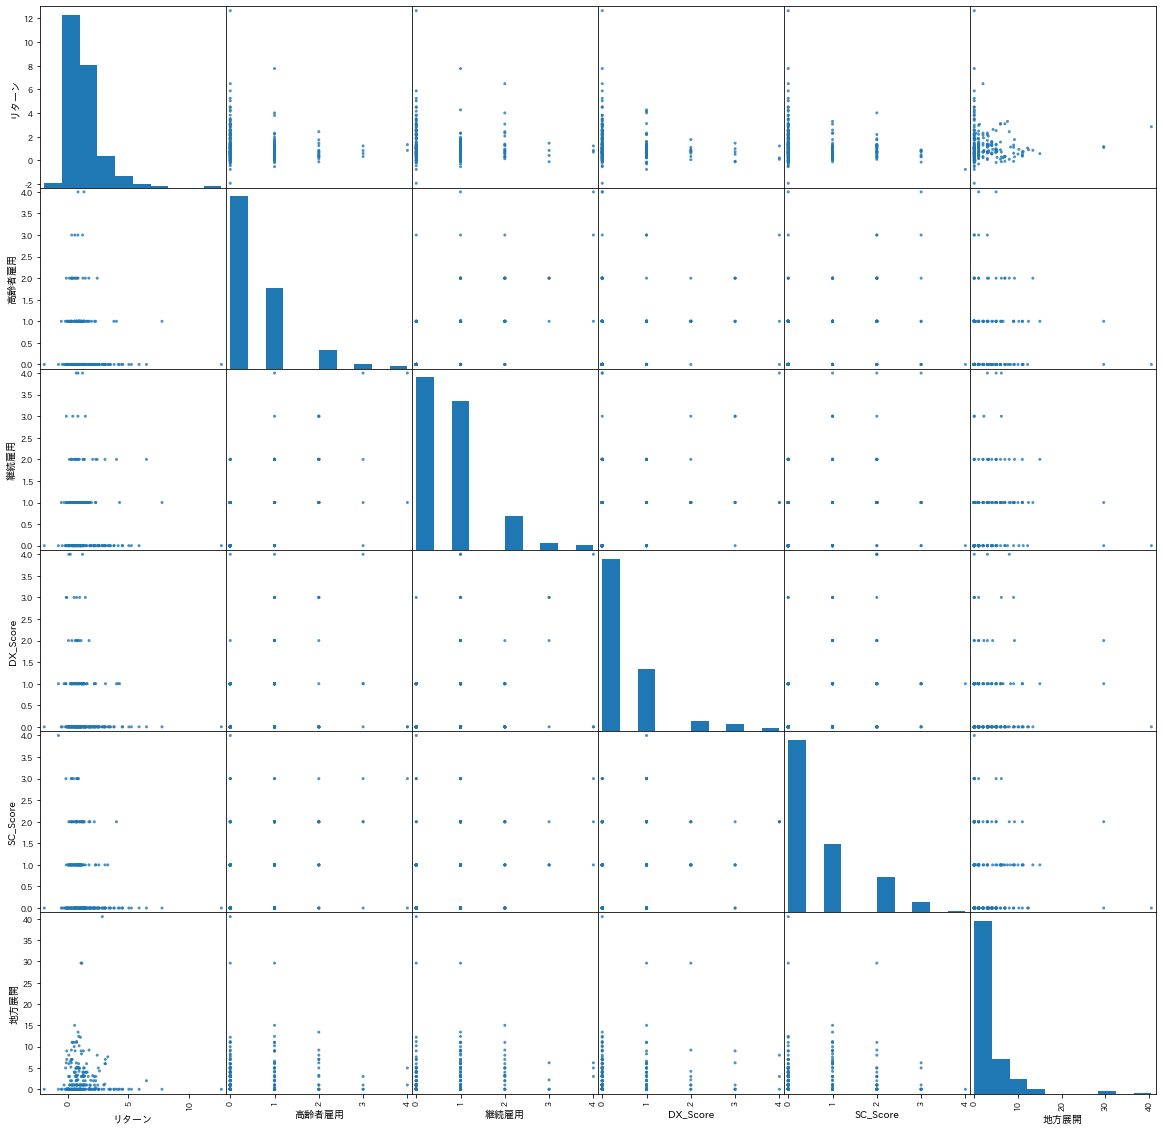

In [110]:
from pandas import plotting

plotting.scatter_matrix(df, figsize = (20, 20), alpha = 0.8)
#plt.savefig('散布図行列.png', dpi = 1000)

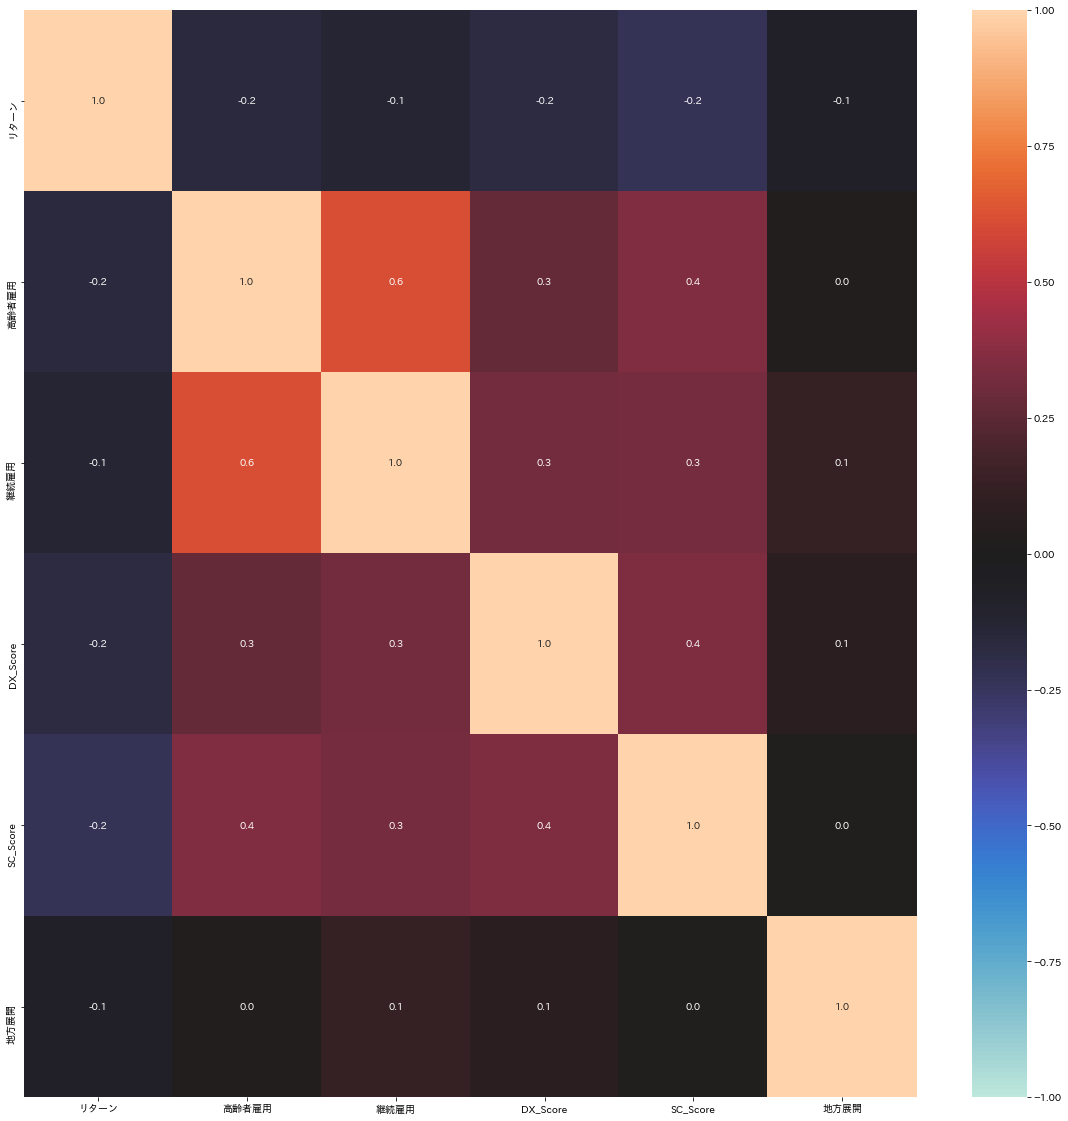

In [111]:
corr_mat = df.corr(method='pearson')

plt.figure(figsize = (20, 20))
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, 
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
#plt.savefig('第2スクリーニング_検証.png', dpi = 1000)
plt.show()

In [13]:
data_score = pd.read_csv('/Users/shintaro/Downloads/因子得点合計値(調整後)(ver1.1).csv', encoding = 'Shift_jis')

In [14]:
data_score

Unnamed: 0              企業名      第1因子      第2因子      第3因子      第4因子  \
0            0             エーザイ  0.350971  0.679433  1.210614 -0.123066   
1            1            ファンケル  0.673754  2.497369  1.522027 -0.487406   
2            2             デンソー -0.814127  0.540244  0.733331  0.427834   
3            3          三菱総合研究所  0.762613  1.715920 -0.091507  0.207436   
4            4             日本郵船  0.388690 -1.295755 -0.136325  2.992249   
5            5            大日本印刷 -0.745009  1.186887  0.306962  1.151793   
6            6              東洋紡  1.117799 -0.364301  0.490970 -0.199555   
7            7          コニカミノルタ -0.983410  0.231368 -1.531768  2.613522   
8            8              京セラ -1.097602  1.241072  0.370575  0.433792   
9            9             ＫＤＤＩ  1.821199 -0.071053 -0.387120  0.289445   
10          10             ローソン  0.057810 -1.395260  2.474586  0.283805   
11          11              ヤマト  0.490135  1.619144 -0.201795 -0.073649   
12          12             三菱商事 -0.138983 -0.346529  0.670626  1.340198   
13          13             三菱電機  0.123664  1.036062 -0.587500 -0.026093   
14          14         アウトソーシング -0.484894 -0.980660  3.249862 -0.638794   
15          15      ヤマトホールディングス  0.994449  0.500974  0.068911 -0.595586   
16          16              富士通  1.377926  0.508390 -0.483069 -1.214663   
17          17              味の素  1.079844 -0.040535  0.128871 -0.866593   
18          18           パナソニック  0.357897 -0.084888 -0.296571 -0.727275   
19          19               東芝 -0.091305  0.308653 -0.692023  0.105394   
20          20             富士電機  0.451810  0.580104 -0.599215 -0.411261   
21          21             三井物産 -0.193234 -0.119948 -0.041287  0.898377   
22          22             日本通運  0.514447 -0.153196  0.136757 -0.208746   
23          23           トヨタ自動車  0.247703 -0.674020 -0.375705 -0.009929   
24          24             住友商事 -0.510541 -0.273528 -0.932484  1.681317   
25          25               丸紅 -0.102670 -0.895215 -0.492336  1.123352   
26          26               鈴木  0.491208  0.432156 -0.233282 -0.935886   
27          27            日立製作所  0.781345 -0.826247 -0.381998 -0.659150   
28          28            三菱重工業 -0.127704 -0.909127  0.196832 -0.352192   
29          29  アサヒグループホールディングス -0.146334 -2.211512  0.724253 -0.132795   
30          30             住友林業  0.307695  0.217634 -0.729998 -0.728943   
31          31              リコー -1.121649  0.461890 -1.598230 -0.235884   
32          32            日産自動車 -0.514775 -1.009603 -0.802337 -1.598350   
33          33            三井不動産 -0.152450 -1.417531 -0.004867 -0.489456   
34          34            川崎重工業 -0.620940 -1.098190 -1.718658 -1.695762   
35          35             日本航空 -4.545329  0.409800  0.032899 -1.137480   

        第5因子       合計点  合計点(得点調整後)  
0   4.779800  6.897751    6.897751  
1  -0.868982  3.336762    3.178206  
2   1.630487  2.517769    2.512154  
3  -0.625061  1.969401    1.978552  
4  -0.098310  1.850548    1.934771  
5  -0.347084  1.553550    1.553550  
6   0.417399  1.462312    1.388207  
7   1.020916  1.350627    1.350627  
8   0.262427  1.210264    1.093330  
9  -0.571583  1.080888    1.080888  
10 -0.366594  1.054346    1.054346  
11 -0.804631  1.029204    0.923740  
12 -0.721589  0.803724    0.803724  
13  0.097732  0.643865    0.585879  
14 -0.636642  0.508871    0.582149  
15 -0.708691  0.260057    0.341719  
16 -0.156910  0.031673    0.174296  
17 -0.203382  0.098206    0.111093  
18  0.813088  0.062250    0.054732  
19  0.317781 -0.051500   -0.002295  
20 -0.083428 -0.061990   -0.053665  
21 -0.740724 -0.196817   -0.185287  
22 -0.566723 -0.277461   -0.277461  
23  0.377492 -0.434459   -0.480545  
24 -0.684061 -0.719297   -0.626049  
25 -0.424274 -0.791143   -0.741249  
26 -0.567414 -0.813219   -0.813219  
27  0.290999 -0.795050   -0.837230  
28  0.265669 -0.926522   -0.926522  
29  0.005265 -1.761124   -1.643231  
30 -0.893502 -1.827115   -1.900115  
31  0.065067 -2.428807   -2.268984  
32  1.1

In [15]:
len_data1 = len(data1)
len_score = len(data_score)

In [16]:
l_comp = data_score['企業名'].tolist()

In [17]:
second_comp = data1.columns

In [18]:
len_comp = len(second_comp)

In [19]:
for i in range(len_comp):
    if not(second_comp[-(i+1)] in l_comp):
        del data1[second_comp[-(i+1)]]

In [20]:
l_comp

['エーザイ',
 'ファンケル',
 'デンソー',
 '三菱総合研究所',
 '日本郵船',
 '大日本印刷',
 '東洋紡',
 'コニカミノルタ',
 '京セラ',
 'ＫＤＤＩ',
 'ローソン',
 'ヤマト',
 '三菱商事',
 '三菱電機',
 'アウトソーシング',
 'ヤマトホールディングス',
 '富士通',
 '味の素',
 'パナソニック',
 '東芝',
 '富士電機',
 '三井物産',
 '日本通運',
 'トヨタ自動車',
 '住友商事',
 '丸紅',
 '鈴木',
 '日立製作所',
 '三菱重工業',
 'アサヒグループホールディングス',
 '住友林業',
 'リコー',
 '日産自動車',
 '三井不動産',
 '川崎重工業',
 '日本航空']

In [21]:
R1 = (data1.diff()/data1.shift(1))[1:] *100

In [22]:
return1 = R1.mean().tolist()

In [23]:
l_comp1 = R1.columns.tolist()

In [24]:
l1 = len(l_comp1)

In [25]:
Data = [[]for i in range(l1)]

for i in range(l1):
    
    Data[i].append(l_comp1[i])
    Data[i].append(return1[i])

In [26]:
Data

[['エーザイ', 1.330633749323981],
 ['ファンケル', 1.7753335716384833],
 ['デンソー', 1.3431865261275975],
 ['三菱総合研究所', 0.7366432660457587],
 ['日本郵船', 2.459703276957425],
 ['大日本印刷', 0.40602085422049644],
 ['東洋紡', -0.293349741938078],
 ['コニカミノルタ', -0.08101384598744736],
 ['京セラ', 0.7027442711053398],
 ['ＫＤＤＩ', 0.23785122846454718],
 ['ローソン', -0.4741614726648524],
 ['ヤマト', 0.9195130808123477],
 ['三菱商事', 1.1144147995572482],
 ['三菱電機', 0.5635309867184546],
 ['アウトソーシング', 2.952799719396162],
 ['ヤマトホールディングス', 0.6309084117448609],
 ['富士通', 2.7925958119966996],
 ['味の素', 0.2933554830212508],
 ['パナソニック', 0.7223971139189133],
 ['東芝', 1.5471178036718984],
 ['富士電機', 1.6584940191145663],
 ['三井物産', 1.4137544686285426],
 ['日本通運', 0.998235977970712],
 ['トヨタ自動車', 0.9992313004616846],
 ['住友商事', 0.7309646603747765],
 ['丸紅', 1.4540183687432775],
 ['鈴木', 1.5640448847701094],
 ['日立製作所', 1.8880873419367126],
 ['三菱重工業', -0.2640118047967332],
 ['アサヒグループホールディングス', 0.8197228625920019],
 ['住友林業', 1.0110612113912145],
 ['リコー', 0.7

In [27]:
return2 = []

for i in range(l1):
    for j in range(l1):
        if Data[j][0] == l_comp[i]:
            #return2.append(Data[j][0])
            return2.append(Data[j][1])

In [28]:
return2

[1.330633749323981,
 1.7753335716384833,
 1.3431865261275975,
 0.7366432660457587,
 2.459703276957425,
 0.40602085422049644,
 -0.293349741938078,
 -0.08101384598744736,
 0.7027442711053398,
 0.23785122846454718,
 -0.4741614726648524,
 0.9195130808123477,
 1.1144147995572482,
 0.5635309867184546,
 2.952799719396162,
 0.6309084117448609,
 2.7925958119966996,
 0.2933554830212508,
 0.7223971139189133,
 1.5471178036718984,
 1.6584940191145663,
 1.4137544686285426,
 0.998235977970712,
 0.9992313004616846,
 0.7309646603747765,
 1.4540183687432775,
 1.5640448847701094,
 1.8880873419367126,
 -0.2640118047967332,
 0.8197228625920019,
 1.0110612113912145,
 0.7752699297053317,
 -0.3857728886190791,
 0.5230498807594787,
 0.06652364796301692,
 -0.22078208420057463]

In [29]:
data_score['リターン'] = return2

In [30]:
data_score

Unnamed: 0              企業名      第1因子      第2因子      第3因子      第4因子  \
0            0             エーザイ  0.350971  0.679433  1.210614 -0.123066   
1            1            ファンケル  0.673754  2.497369  1.522027 -0.487406   
2            2             デンソー -0.814127  0.540244  0.733331  0.427834   
3            3          三菱総合研究所  0.762613  1.715920 -0.091507  0.207436   
4            4             日本郵船  0.388690 -1.295755 -0.136325  2.992249   
5            5            大日本印刷 -0.745009  1.186887  0.306962  1.151793   
6            6              東洋紡  1.117799 -0.364301  0.490970 -0.199555   
7            7          コニカミノルタ -0.983410  0.231368 -1.531768  2.613522   
8            8              京セラ -1.097602  1.241072  0.370575  0.433792   
9            9             ＫＤＤＩ  1.821199 -0.071053 -0.387120  0.289445   
10          10             ローソン  0.057810 -1.395260  2.474586  0.283805   
11          11              ヤマト  0.490135  1.619144 -0.201795 -0.073649   
12          12             三菱商事 -0.138983 -0.346529  0.670626  1.340198   
13          13             三菱電機  0.123664  1.036062 -0.587500 -0.026093   
14          14         アウトソーシング -0.484894 -0.980660  3.249862 -0.638794   
15          15      ヤマトホールディングス  0.994449  0.500974  0.068911 -0.595586   
16          16              富士通  1.377926  0.508390 -0.483069 -1.214663   
17          17              味の素  1.079844 -0.040535  0.128871 -0.866593   
18          18           パナソニック  0.357897 -0.084888 -0.296571 -0.727275   
19          19               東芝 -0.091305  0.308653 -0.692023  0.105394   
20          20             富士電機  0.451810  0.580104 -0.599215 -0.411261   
21          21             三井物産 -0.193234 -0.119948 -0.041287  0.898377   
22          22             日本通運  0.514447 -0.153196  0.136757 -0.208746   
23          23           トヨタ自動車  0.247703 -0.674020 -0.375705 -0.009929   
24          24             住友商事 -0.510541 -0.273528 -0.932484  1.681317   
25          25               丸紅 -0.102670 -0.895215 -0.492336  1.123352   
26          26               鈴木  0.491208  0.432156 -0.233282 -0.935886   
27          27            日立製作所  0.781345 -0.826247 -0.381998 -0.659150   
28          28            三菱重工業 -0.127704 -0.909127  0.196832 -0.352192   
29          29  アサヒグループホールディングス -0.146334 -2.211512  0.724253 -0.132795   
30          30             住友林業  0.307695  0.217634 -0.729998 -0.728943   
31          31              リコー -1.121649  0.461890 -1.598230 -0.235884   
32          32            日産自動車 -0.514775 -1.009603 -0.802337 -1.598350   
33          33            三井不動産 -0.152450 -1.417531 -0.004867 -0.489456   
34          34            川崎重工業 -0.620940 -1.098190 -1.718658 -1.695762   
35          35             日本航空 -4.545329  0.409800  0.032899 -1.137480   

        第5因子       合計点  合計点(得点調整後)      リターン  
0   4.779800  6.897751    6.897751  1.330634  
1  -0.868982  3.336762    3.178206  1.775334  
2   1.630487  2.517769    2.512154  1.343187  
3  -0.625061  1.969401    1.978552  0.736643  
4  -0.098310  1.850548    1.934771  2.459703  
5  -0.347084  1.553550    1.553550  0.406021  
6   0.417399  1.462312    1.388207 -0.293350  
7   1.020916  1.350627    1.350627 -0.081014  
8   0.262427  1.210264    1.093330  0.702744  
9  -0.571583  1.080888    1.080888  0.237851  
10 -0.366594  1.054346    1.054346 -0.474161  
11 -0.804631  1.029204    0.923740  0.919513  
12 -0.721589  0.803724    0.803724  1.114415  
13  0.097732  0.643865    0.585879  0.563531  
14 -0.636642  0.508871    0.582149  2.952800  
15 -0.708691  0.260057    0.341719  0.630908  
16 -0.156910  0.031673    0.174296  2.792596  
17 -0.203382  0.098206    0.111093  0.293355  
18  0.813088  0.062250    0.054732  0.722397  
19  0.317781 -0.051500   -0.002295  1.547118  
20 -0.083428 -0.061990   -0.053665  1.658494  
21 -0.740724 -0.196817   -0.185287  1.413754  
22 -0.566723 -0.277461   -0.277461  0.998236  
23  0.377492 -0.434459   -0.480545  0.999231  
24 -0.684061 -0.719297   -0.626049  0.730965  
25 -0.

In [31]:
del data_score['Unnamed: 0']
del data_score['企業名']
del data_score['第1因子']
del data_score['第2因子']
del data_score['第3因子']
del data_score['第4因子']
del data_score['第5因子']
del data_score['合計点']

array([[<AxesSubplot:xlabel='合計点(得点調整後)', ylabel='合計点(得点調整後)'>,
        <AxesSubplot:xlabel='リターン', ylabel='合計点(得点調整後)'>],
       [<AxesSubplot:xlabel='合計点(得点調整後)', ylabel='リターン'>,
        <AxesSubplot:xlabel='リターン', ylabel='リターン'>]], dtype=object)

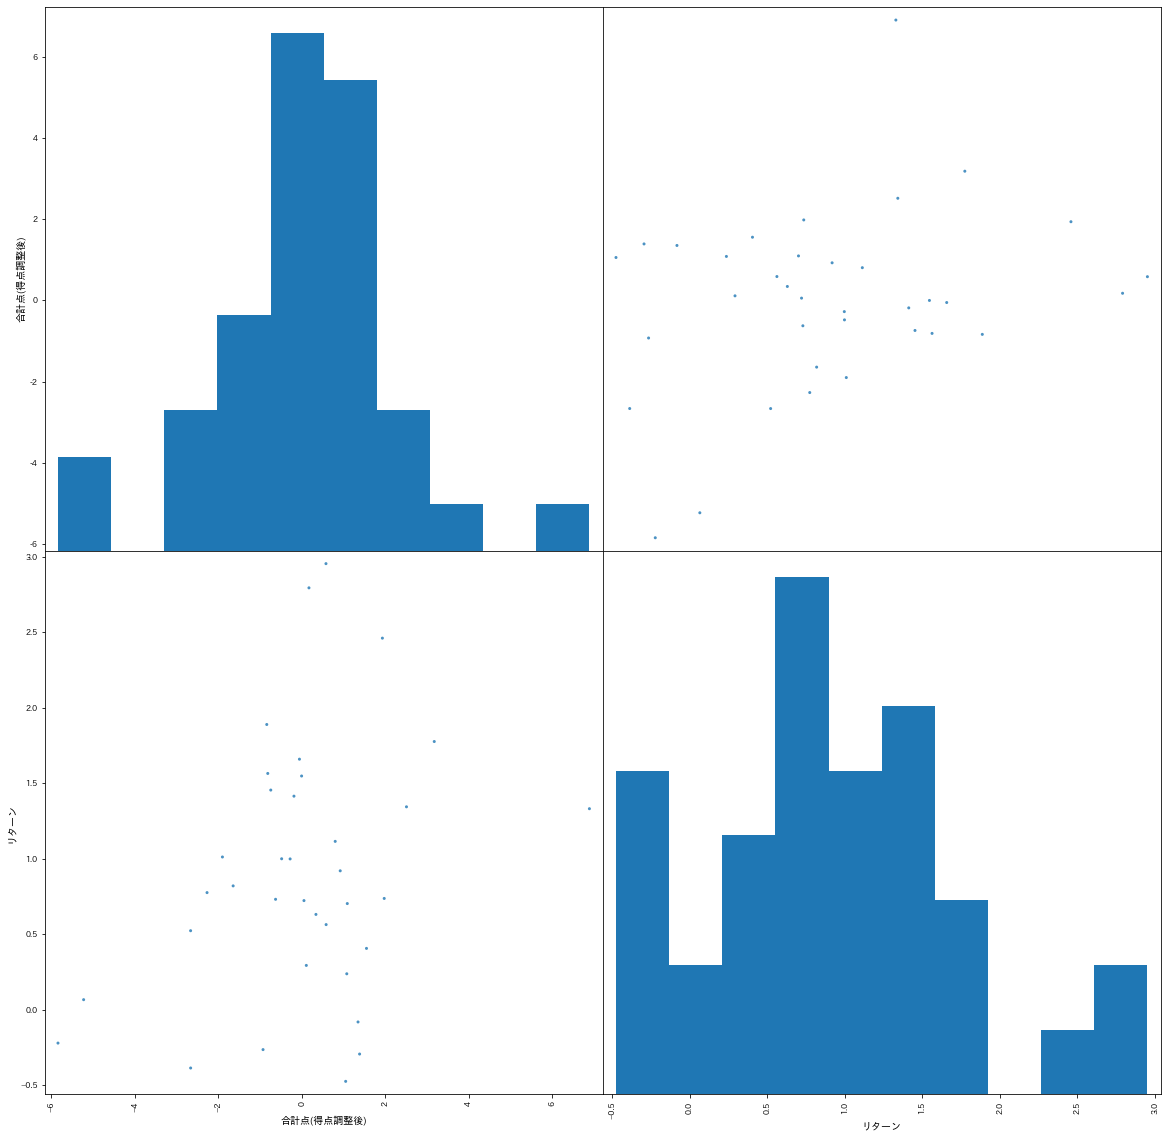

In [32]:
from pandas import plotting

plotting.scatter_matrix(data_score, figsize = (20, 20), alpha = 0.8)
#plt.savefig('散布図行列.png', dpi = 1000)

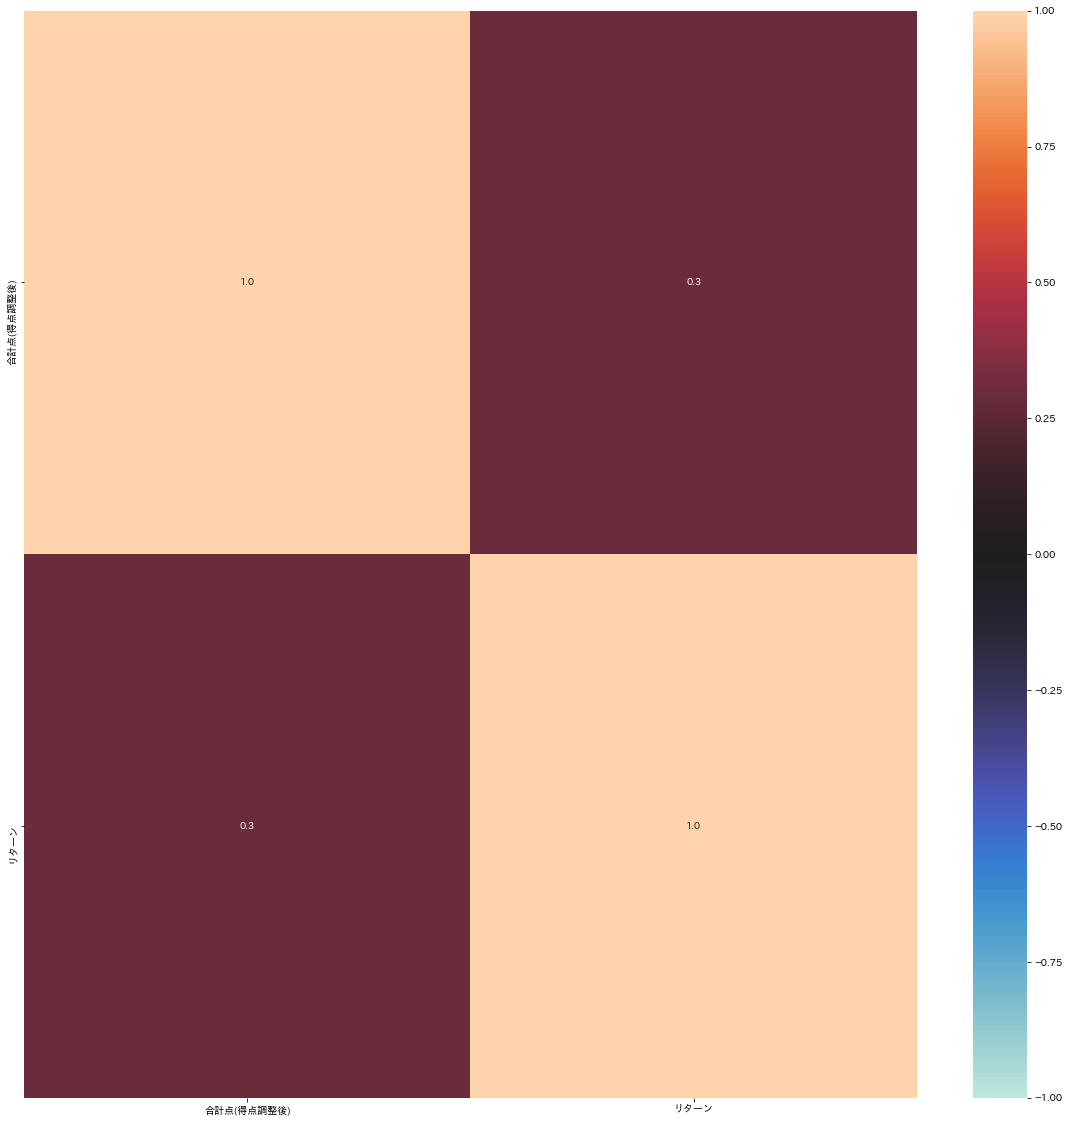

In [35]:
corr_mat = data_score.corr(method='pearson')

plt.figure(figsize = (20, 20))
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, 
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
#plt.savefig('第2スクリーニング_検証.png', dpi = 1000)
plt.show()

<AxesSubplot:xlabel='合計点(得点調整後)', ylabel='リターン'>

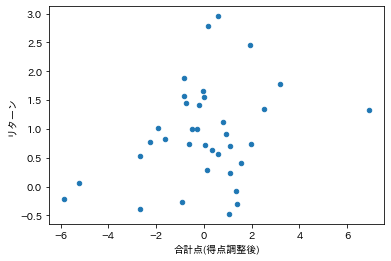

In [36]:
data_score.plot.scatter(x='合計点(得点調整後)', y='リターン')
#plt.savefig('検証_散布図.png', dpi = 1000)

In [37]:
print(data_score.corr())

            合計点(得点調整後)     リターン
合計点(得点調整後)     1.00000  0.29441
リターン           0.29441  1.00000


In [38]:
x = data_score[['合計点(得点調整後)']]
y = data_score[['リターン']]

In [39]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x, y)

LinearRegression()

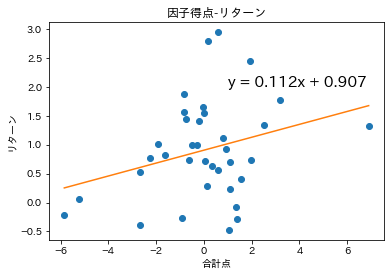

モデル関数の回帰変数 w1: 0.112
モデル関数の切片 w2: 0.907
y= 0.112x + 0.907
決定係数 R^2：  0.08667700497307773


In [40]:
plt.title('因子得点-リターン')
plt.xlabel('合計点')
plt.ylabel('リターン')
plt.plot(x, y, 'o')
plt.plot(x, model_lr.predict(x), linestyle="solid")
#plt.savefig('3rd_screening_LinearRegression_改.png', dpi=1000)
plt.text(1, 2, 'y = 0.112x + 0.907', fontsize = 15.5)
#plt.text(1.0, 2.4, '$ R^{2} $=' + str(round(model_lr.score(x, y), 4)), fontsize = 15)
#plt.savefig('3rd_screening_LinearRegression_改.png', dpi=1000)
plt.show()

print('モデル関数の回帰変数 w1: %.3f' %model_lr.coef_)
print('モデル関数の切片 w2: %.3f' %model_lr.intercept_)
print('y= %.3fx + %.3f' % (model_lr.coef_ , model_lr.intercept_))
print('決定係数 R^2： ', model_lr.score(x, y))

In [41]:
import statsmodels.api as sm

x_add_const = sm.add_constant(x)
model_sm = sm.OLS(y, x_add_const).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   リターン   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     3.227
Date:                Sat, 08 Jan 2022   Prob (F-statistic):             0.0813
Time:                        15:18:32   Log-Likelihood:                -43.025
No. Observations:                  36   AIC:                             90.05
Df Residuals:                      34   BIC:                             93.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9073      0.137      6.617      0.0

In [94]:
marketcap = pd.read_csv('test_data(ver1.0).csv', encoding='Shift_JIS')
del marketcap['銘柄名称']
del marketcap['TOPIX']
del marketcap['日経平均']
del marketcap['西日本フィナンシャルホールディングス']
del marketcap['関西電力']
del marketcap['静岡銀行']
del marketcap['キヤノン']

In [95]:
comp_name = marketcap.columns.tolist()

In [96]:
R = (marketcap.diff()/marketcap.shift(1))[1:] * 100

In [97]:
Return = R.mean().values.tolist()

In [98]:
len(Return) == len(l_comp)

True

In [99]:
Data1 = [[]for i in range(len(comp_name))]

for i in range(len(comp_name)):
    Data1[i].append(comp_name[i])
    Data1[i].append(Return[i])

In [100]:
Data2 = []

for i in range(len(l_comp)):
    for j in range(len(comp_name)):
        if comp_name[j] == l_comp[i]:
            Data2.append(Data1[j][1])